## class and functions

In [77]:
     
class prepro():
    def __init__(self, data):
        self.data=data
    
    def info(self):
        import pandas as pd 
        from pandas import Series, DataFrame
        
        print(self.data.head())
        
        print("DATA INFORMATION:")
        print(self.data.info())
        
        print("DATA DESCRIPTION:")
        print(self.data.describe())
        
        print("NULL VALUES:")
        print(self.data.isnull().sum(axis = 0))
    
class inf_stats(): 
    def __init__(self, data):
        self.data=data
        
    def corr(self):
        import seaborn as sns
        import matplotlib.pyplot as plt       
        fig,ax = plt.subplots(figsize=(7, 7))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

    def norm_test(self, column):
        import pylab
        import scipy.stats as stats
        from scipy.stats import shapiro
        
        print("H0: Data normally distributed\n")      
        
        
        stat, p= shapiro(self.data[column])
        print("Statistic= {} , p-val={}".format( stat, p))
        
        if p>0.05:
            print("H0-> Fail to Reject. Data is normally distributed.")
        else:
            print("H0-> Reject. Data is not normally distributed.")
        
        #Probability plot çizdirerek, görselleştirme de yapıyoruz.
        stats.probplot(self.data[column],dist='norm',plot=pylab)
        pylab.show()
        
    def t_test(self, popmean, column):
        import scipy.stats as stats 
        import statsmodels.stats.api as sms
        
        #one- sample t-test 
        self.column=column
        self.popmean=popmean
        print("Hypothesis:\nH0:μ0={}\n".format(self.popmean))
        
        #calculation of p-value and statistic
        stat, pval=stats.ttest_1samp(self.data[self.column],popmean=self.popmean)
        print('RESULT=\nStatistics=%.3f,p-value=%.3f' % (stat,pval))
        
        #confidence interval
        cf=sms.DescrStatsW(self.data[self.column]).tconfint_mean()
        print("Confidence Interval={}\n".format(cf))
        
        if pval<0.05:
            print("Reject H0 --> μ0≠{}". format(self.popmean))
        else:
            print("Fail to reject H0 --> μ0={}". format(self.popmean))
     
    def num_cat(self,cl1,cl2):
        import pandas as pd 
        import numpy as np 
        from scipy.stats import shapiro 
        A=Series(self.data[cl1].iloc[:][data[cl2]==1])
        B=Series(self.data[cl1].iloc[:][data[cl2]==0])
        
        #A_B=pd.concat([A,B], axis=1)
        #A_B.columns=["A","B"]

        print("    ******KS TEST******   ")
        print("HİPOTEZ:")
        print("H0:{}-{}=1 and {}-{} =0 have same distribution\n".format(cl1,cl2,cl1,cl2))
        import scipy
        
        stat, p=scipy.stats.ks_2samp(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different distribution\n")
        else:
            print("H0--> Fail to Reject.\n")
        
        import scipy.stats as stats
        
        print("VARIANCE:")
        print("HİPOTEZ:")
        print("H0:'{}' and '{}' have same variance\n".format(cl1,cl2))
        
        stat, p=stats.levene(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different variance\n")
        else:
            print("H0--> Fail to Reject.")
            
        if p<0.05:
            equal_var=False
        else:
            equal_var=True
        print("MEAN:")
        stat, p=stats.ttest_ind(A,B)
        print("Statistic= {}, p-val={}".format(stat,p))
        if p<0.05:
            print("H0--> Reject. They have different mean\n")
        else:
            print("H0--> Fail to Reject.")
            
    def chi2(self,cl1,cl2):
        import scipy.stats 
        cross=pd.crosstab(index=self.data[cl2], columns=self.data[cl1])
        from numbers import Number
        chi2,p,dof,expected= scipy.stats.chi2_contingency(cross)#survived ve sex arasında bağlantı var mı?
        result=[["chi",chi2],["p",p]]
        print(result)

    
    
    def box_2samp(self,cl1,cl2):
        import matplotlib.pyplot as plt
        import seaborn as sns
        figg=plt.figure(figsize=(5,5))
        sns.boxplot(x=data[cl1],y=data[cl2])

class visualize():
    def __init__(self, data):
        self.data=data
    
    def hist_all(self):
        import matplotlib.pyplot as plt
        #self.column=column
        
        for col in self.data.columns:
            fig=self.data[col].plot.hist()
            fig.set_title(col)
            plt.show()
        
        

class model():
    pass
class supervised(model): #inheritance
    def regression():
        pass
    def classification():
        pass
class unsupervised(model):
    def clustering():
        pass

## Data Information

In [132]:
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()

In [89]:
dfprepro=prepro(df)
dfprepro.info()

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

## Deleting Null variables

In [133]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [102]:
df["ind_420"].isnull().sum(axis=0)

0

In [103]:
df["ind_422"].isnull().sum(axis=0)

0

## Categorical Variable 

In [104]:
col=df.columns

num_cols=df._get_numeric_data().columns
CAT=set(col)-set(num_cols)
CAT

{'ind_109'}

## Correlation Table

In [134]:
dfcor=df.drop(["ind_109"], axis=1).astype("float64")

In [135]:
dfcor=dfcor.corr()
dfcor

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.990115,0.547483,-0.518832,0.644215,0.820822,0.777479,-0.045803,-0.067730,-0.092888,...,-0.324564,-0.587574,-0.317846,-0.329648,0.078010,0.621468,0.816156,0.052210,0.081537,0.073107
ind_6,0.990115,1.000000,0.521053,-0.479383,0.604380,0.767504,0.722541,-0.034480,-0.057776,-0.086007,...,-0.299246,-0.536726,-0.320019,-0.331171,0.023117,0.562515,0.809119,0.052347,0.081567,0.073585
ind_8,0.547483,0.521053,1.000000,-0.369578,0.826063,0.585052,0.480337,0.146128,0.119751,0.016810,...,-0.268403,-0.421079,-0.144740,-0.159317,0.142893,0.595508,0.458084,-0.016948,0.001962,-0.011621
ind_9,-0.518832,-0.479383,-0.369578,1.000000,-0.828971,-0.602616,-0.560931,0.260789,0.263371,0.172689,...,0.346778,0.504424,0.131142,0.160855,-0.180249,-0.639987,-0.439689,-0.023754,-0.005618,0.013177
ind_10,0.644215,0.604380,0.826063,-0.828971,1.000000,0.717645,0.629334,-0.070218,-0.087661,-0.094621,...,-0.371881,-0.559393,-0.166660,-0.193456,0.195333,0.746605,0.542404,0.004207,0.004588,-0.014987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.621468,0.562515,0.595508,-0.639987,0.746605,0.775348,0.699661,-0.095876,-0.100360,-0.087605,...,-0.370107,-0.583362,-0.170756,-0.204524,0.341137,1.000000,0.580932,0.023080,0.016545,0.003437
ind_428,0.816156,0.809119,0.458084,-0.439689,0.542404,0.808156,0.729684,-0.006137,-0.019001,-0.035110,...,-0.281079,-0.459643,-0.327875,-0.358164,0.189822,0.580932,1.000000,0.041987,0.068053,0.058844
20_target,0.052210,0.052347,-0.016948,-0.023754,0.004207,0.034990,0.041982,0.001557,0.001838,0.025399,...,-0.004466,-0.044326,-0.001936,-0.035405,0.002466,0.023080,0.041987,1.000000,0.372915,0.344982
50_target,0.081537,0.081567,0.001962,-0.005618,0.004588,0.065218,0.057671,0.075191,0.087573,0.107244,...,0.041196,-0.114093,-0.030940,0.003000,-0.001411,0.016545,0.068053,0.372915,1.000000,0.935970


In [107]:
dfcor['20_target'].iloc[:][(dfcor['20_target']>= 0.1)]

20_target    1.000000
50_target    0.372915
90_target    0.344982
Name: 20_target, dtype: float64

In [111]:
dfcor['50_target'].iloc[:][(dfcor['50_target']>= 0.1)]

ind_16       0.107244
ind_17       0.124296
ind_18       0.130508
ind_36       0.110087
ind_74       0.104423
ind_77       0.121269
ind_332      0.102745
ind_412      0.135387
20_target    0.372915
50_target    1.000000
90_target    0.935970
Name: 50_target, dtype: float64

In [112]:
dfcor['90_target'].iloc[:][(dfcor['90_target']>= 0.1)]

ind_16       0.112978
ind_17       0.131409
ind_18       0.142171
ind_77       0.107244
ind_332      0.104910
ind_412      0.134286
20_target    0.344982
50_target    0.935970
90_target    1.000000
Name: 90_target, dtype: float64

In [136]:
#50_target is selected as target.
df=df.rename(columns={"50_target": "target"})
dfcor=dfcor.rename(columns={"50_target": "target"})

# Numeric Variables-Target

In [124]:
## Visualization of variables that have highest correlation with target

In [125]:
dfcor['target'].iloc[:][(dfcor['target']>= 0.1)]

ind_16       0.107244
ind_17       0.124296
ind_18       0.130508
ind_36       0.110087
ind_74       0.104423
ind_77       0.121269
ind_332      0.102745
ind_412      0.135387
20_target    0.372915
50_target    1.000000
90_target    0.935970
Name: target, dtype: float64

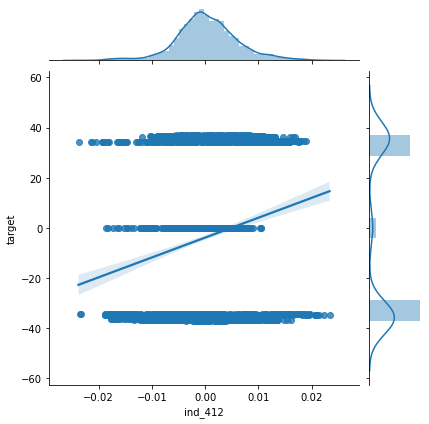

In [126]:
import seaborn as sns 
sns.jointplot(x="ind_412",y="target",data=df, kind="reg")

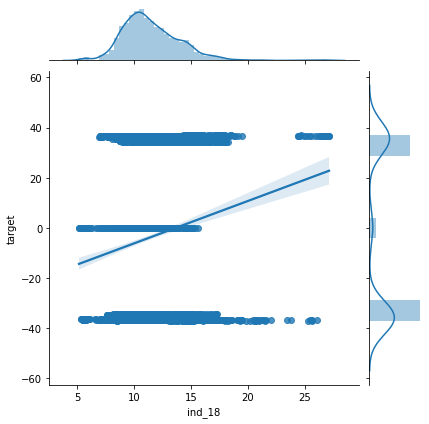

In [128]:
import seaborn as sns 
sns.jointplot(x="ind_18",y="target",data=df, kind="reg")

## T test between target and categorical variable

In [249]:
import scipy.stats as stats
from scipy.stats import shapiro
from pandas import Series, DataFrame
A=Series(df["target"].iloc[:][df["ind_109"]=='GREEN'])
B=Series(df["target"].iloc[:][df["ind_109"]=='RED'])
print("    ******KS TEST******\n ")


import scipy
        
stat, p=scipy.stats.ks_2samp(A,B)
print("Statistic= {}, p-val={}".format(stat,p))
if p<0.01:
    print("H0--> Reject. DIFFERENT DISTRIBUTION\n")
else:
    print("H0--> Fail to Reject.\n")
    
import scipy.stats as stats
        
print("***********VARIANCE:************")
print("HİPOTEZ:")
#print("H0:'mortdue-1' and 'mortdue-0' have same variance\n")
        
stat, p=stats.levene(A,B)
print("Statistic= {}, p-val={}".format(stat,p))
if p<0.01:
    print("H0--> Reject. DIFFERENT VARIANCE\n")
else:
    print("H0--> Fail to Reject.\n")
            
if p<0.01:
    equ_var=False
else:
    equ_var=True
print("**********MEAN:************")
stat, p=stats.ttest_ind(A,B, equal_var=equ_var)
print("Statistic= {}, p-val={}".format(stat,p))
if p<0.05:
    print("H0--> Reject.\n DIFFERENT MEAN\n")
else:
    print("H0--> Fail to Reject.")

    ******KS TEST******
 
Statistic= 0.03600864282964342, p-val=0.06979062305947004
H0--> Fail to Reject.

***********VARIANCE:************
HİPOTEZ:
Statistic= 2.470658470515576, p-val=0.11605106555455019
H0--> Fail to Reject.

**********MEAN:************
Statistic= -1.5971919952189828, p-val=0.11028457920722129
H0--> Fail to Reject.


In [ ]:
#target and categorcial variable do not have different mean and variance. ind_109 will be not included model.

# LINEAR REGRESSION

## 1- Statsmodels

In [180]:
y=df["target"]
X=df.drop(["ind_109","20_target","90_target","target"],axis=1)
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [181]:
X_train.shape

(4100, 132)

In [182]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
model1=lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.218
Model:                            OLS   Adj. R-squared (uncentered):              0.192
Method:                 Least Squares   F-statistic:                              8.394
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   6.24e-132
Time:                        00:15:21   Log-Likelihood:                         -19824.
No. Observations:                4100   AIC:                                  3.991e+04
Df Residuals:                    3968   BIC:                                  4.075e+04
Df Model:                         132                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_5          1.0142      0.914      1.110      0.267      -0.777       2.805
ind_6          0.2176      0.735      0.296      0.767      -1.223       1.658
ind_8      -3.117e+08   1.45e+08     -2.150      0.032   -5.96e+08   -2.74e+07
ind_9       3.117e+08   1.45e+08      2.150      0.032    2.74e+07    5.96e+08
ind_10      3.117e+08   1.45e+08      2.150      0.032    2.74e+07    5.96e+08
ind_12        -0.2888      2.129     -0.136      0.892      -4.463       3.885
ind_13        -0.0062      0.027     -0.226      0.821      -0.060       0.048
ind_14        -0.0350      0.187     -0.187      0.851      -0.401       0.331
ind_15        -0.0095      0.263     -0.036      0.971      -0.526       0.507
ind_16        -0.0019      0.388     -0.005      0.996      -0.763       0.759
ind_17         0.8341      0.406      2.054      0.040       0.038       1.630
ind_18         1.1985      0.300      4.001      0.000       0.611       1.786
ind_19         0.2322      1.398      0.166      0.868      -2.509       2.973
ind_20         0.3904      1.117      0.350      0.727      -1.799       2.580
ind_21        -0.1657      1.320     -0.126      0.900      -2.753       2.421
ind_22        -0.1495      0.349     -0.429      0.668      -0.833       0.534
ind_23        -0.2593      0.353     -0.734      0.463      -0.952       0.433
ind_25     -3.408e+05   1.06e+06     -0.322      0.748   -2.42e+06    1.74e+06
ind_26     -3.406e+05   1.06e+06     -0.321      0.748   -2.42e+06    1.74e+06
ind_27      6.762e+05   2.12e+06      0.319      0.750   -3.48e+06    4.83e+06
ind_28         0.0013      0.012      0.104      0.917      -0.023       0.025
ind_29        -0.0192      0.019     -1.005      0.315      -0.057       0.018
ind_30        -0.0464      0.022     -2.157      0.031      -0.089      -0.004
ind_31         0.0661      0.030      2.199      0.028       0.007       0.125
ind_32        -0.0646      0.028     -2.316      0.021      -0.119      -0.010
ind_33         0.0851      0.026      3.297      0.001       0.035       0.136
ind_34        -0.0625      0.030     -2.085      0.037      -0.121      -0.004
ind_35         0.0133      0.025      0.536      0.592      -0.035       0.062
ind_36         0.0003      0.018      0.015      0.988      -0.034       0.035
ind_37         0.1354      0.018      7.394      0.000       0.100       0.171
ind_39        -0.0989      0.084     -1.174      0.240      -0.264       0.066
ind_40        -0.4725      1.345     -0.351      0.725      -3.110       2.165
ind_41        -0.1061      0.079     -1.338      0.181      -0.262       0.049
ind_42         0.5943      0.403      1.476      0.140      -0.195       1.384
ind_43         0.3400      0.267      1.274      0.203      -

In [183]:
A=model1.pvalues
removing=A[A>0.05]
removing

ind_5      0.266981
ind_6      0.767093
ind_12     0.892099
ind_13     0.821033
ind_14     0.851482
             ...   
ind_414    0.808700
ind_418    0.122197
ind_422    0.442461
ind_424    0.524320
ind_426    0.793923
Length: 88, dtype: float64

In [184]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4100, 44)

In [185]:
X_test=X_test.drop(removing.index,axis=1)


In [186]:
X_test.shape

(1026, 44)

##  Remove variables that have p-value>0.05 #1

In [187]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
model1=lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.178
Model:                            OLS   Adj. R-squared (uncentered):              0.169
Method:                 Least Squares   F-statistic:                              20.02
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   1.02e-139
Time:                        00:15:23   Log-Likelihood:                         -19926.
No. Observations:                4100   AIC:                                  3.994e+04
Df Residuals:                    4056   BIC:                                  4.022e+04
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8      -2.924e+08   1.39e+08     -2.101      0.036   -5.65e+08   -1.95e+07
ind_9       2.924e+08   1.39e+08      2.101      0.036    1.95e+07    5.65e+08
ind_10      2.924e+08   1.39e+08      2.101      0.036    1.95e+07    5.65e+08
ind_17         0.7696      0.134      5.739      0.000       0.507       1.033
ind_18         0.9439      0.256      3.681      0.000       0.441       1.447
ind_30        -0.0185      0.014     -1.305      0.192      -0.046       0.009
ind_31         0.0402      0.026      1.530      0.126      -0.011       0.092
ind_32        -0.0559      0.025     -2.229      0.026      -0.105      -0.007
ind_33         0.0728      0.023      3.152      0.002       0.028       0.118
ind_34        -0.0139      0.018     -0.755      0.450      -0.050       0.022
ind_37         0.1175      0.014      8.559      0.000       0.091       0.144
ind_47         0.4033      0.106      3.821      0.000       0.196       0.610
ind_50         0.5029      0.119      4.221      0.000       0.269       0.736
ind_51        -0.1749      0.088     -1.986      0.047      -0.348      -0.002
ind_77         0.5596      0.086      6.498      0.000       0.391       0.728
ind_82         6.1072      1.539      3.969      0.000       3.091       9.124
ind_102       -3.9640      0.793     -4.996      0.000      -5.519      -2.409
ind_128       -3.5409      0.679     -5.217      0.000      -4.871      -2.210
ind_130       -0.6636      0.105     -6.319      0.000      -0.869      -0.458
ind_132        0.2691      0.054      4.968      0.000       0.163       0.375
ind_153       -4.7068      0.544     -8.656      0.000      -5.773      -3.641
ind_156        3.0045      0.556      5.399      0.000       1.913       4.095
ind_194        0.3542      0.131      2.693      0.007       0.096       0.612
ind_217        2.0277      0.582      3.485      0.000       0.887       3.168
ind_237        0.1209      0.020      6.126      0.000       0.082       0.160
ind_241        5.4920      1.027      5.349      0.000       3.479       7.505
ind_243     -443.8473     83.548     -5.313      0.000    -607.647    -280.048
ind_311       -4.0586      0.990     -4.100      0.000      -5.999      -2.118
ind_313      339.3746     83.571      4.061      0.000     175.529     503.220
ind_315       -8.0148      1.017     -7.880      0.000     -10.009      -6.021
ind_321       -0.0356      0.015     -2.450      0.014      -0.064      -0.007
ind_324    -2.645e+04   4640.795     -5.699      0.000   -3.55e+04   -1.73e+04
ind_330       10.6686      3.536      3.017      0.003       3.736      17.601
ind_332        0.1446      0.031      4.606      0.000       0.083       0.206
ind_334     9.983e+04   1.68e+04      5.932      0.000    6.6

##  Remove variables that have p-value>0.05 #2

In [188]:
A=model1.pvalues
removing=A[A>0.05]
removing

ind_30     0.191982
ind_31     0.126142
ind_34     0.450298
ind_392    0.143448
ind_428    0.729905
dtype: float64

In [189]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4100, 39)

In [190]:
X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1026, 39)

In [191]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
model1=lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.177
Model:                            OLS   Adj. R-squared (uncentered):              0.169
Method:                 Least Squares   F-statistic:                              22.45
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   5.83e-142
Time:                        00:15:27   Log-Likelihood:                         -19928.
No. Observations:                4100   AIC:                                  3.993e+04
Df Residuals:                    4061   BIC:                                  4.018e+04
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8      -3.004e+08   1.39e+08     -2.161      0.031   -5.73e+08   -2.79e+07
ind_9       3.004e+08   1.39e+08      2.161      0.031    2.79e+07    5.73e+08
ind_10      3.004e+08   1.39e+08      2.161      0.031    2.79e+07    5.73e+08
ind_17         0.7377      0.133      5.548      0.000       0.477       0.998
ind_18         0.9907      0.255      3.881      0.000       0.490       1.491
ind_32        -0.0292      0.016     -1.878      0.060      -0.060       0.001
ind_33         0.0592      0.014      4.150      0.000       0.031       0.087
ind_37         0.1181      0.014      8.650      0.000       0.091       0.145
ind_47         0.3964      0.101      3.933      0.000       0.199       0.594
ind_50         0.5423      0.115      4.716      0.000       0.317       0.768
ind_51        -0.1865      0.088     -2.127      0.033      -0.358      -0.015
ind_77         0.5436      0.085      6.364      0.000       0.376       0.711
ind_82         6.3888      1.528      4.182      0.000       3.394       9.384
ind_102       -3.8114      0.785     -4.856      0.000      -5.350      -2.273
ind_128       -3.4509      0.667     -5.175      0.000      -4.758      -2.143
ind_130       -0.7032      0.100     -7.005      0.000      -0.900      -0.506
ind_132        0.2717      0.054      5.020      0.000       0.166       0.378
ind_153       -4.8492      0.525     -9.236      0.000      -5.879      -3.820
ind_156        3.1406      0.550      5.715      0.000       2.063       4.218
ind_194        0.3497      0.130      2.688      0.007       0.095       0.605
ind_217        2.0210      0.581      3.477      0.001       0.882       3.160
ind_237        0.1202      0.020      6.113      0.000       0.082       0.159
ind_241        5.7585      1.011      5.694      0.000       3.776       7.741
ind_243     -465.3712     82.314     -5.654      0.000    -626.752    -303.991
ind_311       -4.3116      0.973     -4.433      0.000      -6.218      -2.405
ind_313      360.3902     82.137      4.388      0.000     199.357     521.424
ind_315       -8.0928      1.015     -7.974      0.000     -10.083      -6.103
ind_321       -0.0383      0.014     -2.644      0.008      -0.067      -0.010
ind_324    -2.596e+04   4614.405     -5.627      0.000    -3.5e+04   -1.69e+04
ind_330       10.5117      3.532      2.976      0.003       3.587      17.436
ind_332        0.1417      0.031      4.520      0.000       0.080       0.203
ind_334     1.006e+05   1.68e+04      5.986      0.000    6.77e+04    1.34e+05
ind_338       30.4308      3.723      8.174      0.000      23.132      37.729
ind_340       52.5201     11.277      4.657      0.000      30.412      74.628
ind_387       -0.2328      0.120     -1.938      0.053      -

##  Remove variables that have p-value>0.05 #3


In [192]:
A=model1.pvalues
removing=A[A>0.05]
removing

ind_32     0.060414
ind_387    0.052686
dtype: float64

In [193]:
X_train=X_train.drop(removing.index,axis=1)
X_train.shape

(4100, 37)

In [194]:
X_test=X_test.drop(removing.index,axis=1)
X_test.shape

(1026, 37)

In [195]:
import statsmodels.api as sm 
lm=sm.OLS(y_train,X_train)
model1=lm.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              23.42
Date:                Thu, 06 Aug 2020   Prob (F-statistic):                   9.98e-142
Time:                        00:15:34   Log-Likelihood:                         -19932.
No. Observations:                4100   AIC:                                  3.994e+04
Df Residuals:                    4063   BIC:                                  4.017e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_8       -2.93e+08   1.39e+08     -2.109      0.035   -5.65e+08   -2.07e+07
ind_9        2.93e+08   1.39e+08      2.109      0.035    2.07e+07    5.65e+08
ind_10       2.93e+08   1.39e+08      2.109      0.035    2.07e+07    5.65e+08
ind_17         0.7381      0.133      5.550      0.000       0.477       0.999
ind_18         0.9821      0.255      3.850      0.000       0.482       1.482
ind_33         0.0360      0.009      4.015      0.000       0.018       0.054
ind_37         0.1130      0.014      8.360      0.000       0.087       0.140
ind_47         0.4156      0.100      4.151      0.000       0.219       0.612
ind_50         0.5465      0.115      4.752      0.000       0.321       0.772
ind_51        -0.1989      0.088     -2.271      0.023      -0.371      -0.027
ind_77         0.5630      0.085      6.616      0.000       0.396       0.730
ind_82         6.7503      1.511      4.468      0.000       3.788       9.713
ind_102       -3.8341      0.785     -4.886      0.000      -5.373      -2.296
ind_128       -3.4971      0.666     -5.252      0.000      -4.802      -2.192
ind_130       -0.6873      0.100     -6.853      0.000      -0.884      -0.491
ind_132        0.2919      0.053      5.456      0.000       0.187       0.397
ind_153       -4.5970      0.515     -8.925      0.000      -5.607      -3.587
ind_156        3.3775      0.532      6.344      0.000       2.334       4.421
ind_194        0.0719      0.035      2.034      0.042       0.003       0.141
ind_217        1.9431      0.580      3.348      0.001       0.805       3.081
ind_237        0.1201      0.020      6.105      0.000       0.082       0.159
ind_241        5.9639      1.008      5.917      0.000       3.988       7.940
ind_243     -481.8934     82.053     -5.873      0.000    -642.761    -321.025
ind_311       -4.4530      0.970     -4.592      0.000      -6.354      -2.552
ind_313      372.7892     81.900      4.552      0.000     212.219     533.359
ind_315       -8.0621      1.016     -7.939      0.000     -10.053      -6.071
ind_321       -0.0391      0.014     -2.723      0.006      -0.067      -0.011
ind_324    -2.684e+04   4604.621     -5.829      0.000   -3.59e+04   -1.78e+04
ind_330       10.3514      3.533      2.930      0.003       3.424      17.279
ind_332        0.1444      0.031      4.606      0.000       0.083       0.206
ind_334     9.896e+04   1.68e+04      5.886      0.000     6.6e+04    1.32e+05
ind_338       30.1327      3.723      8.094      0.000      22.834      37.431
ind_340       53.3741     11.278      4.732      0.000      31.262      75.486
ind_397       -0.3213      0.107     -3.002      0.003      -0.531      -0.111
ind_412      758.9667    120.510      6.298      0.000     52

In [196]:
mean_squared_error(y_train,model1.fittedvalues)

977.7380636934531

In [197]:
df["target"].mean()

-3.5284512763499807

In [198]:
model1.rsquared

0.17577302283967433

In [199]:
model1.resid[0:10]

5787    -1.160758
4916   -21.376392
4662   -36.275608
5868    27.533055
3388   -11.887145
4971    36.762882
2492   -35.461094
2059     9.223899
3410   -30.203732
5779   -11.736144
dtype: float64

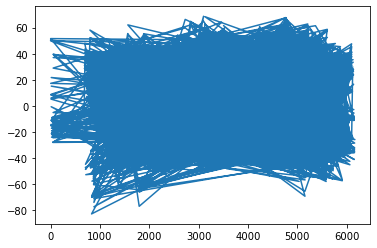

In [200]:
import matplotlib.pyplot as plt
plt.plot(model1.resid)

In [201]:
influence=model1.get_influence()
influence

In [205]:
resid_student=influence.resid_studentized_external

Leverage vs Studentized Residuals


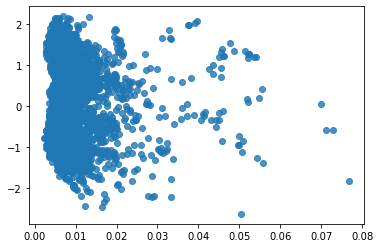

In [206]:
import seaborn as sns 
(cooks,p)= influence.cooks_distance
(diffits,p)=influence.dffits
leverage=influence.hat_matrix_diag
print("Leverage vs Studentized Residuals")
sns.regplot(leverage, model1.resid_pearson, fit_reg=False)

## 2- Scikit Learn

In [207]:
X_train2=X_train

In [208]:
X_test2=X_test

In [209]:
lm=LinearRegression()
model2=lm.fit(X_train2,y_train)

In [210]:
model2.intercept_

109.95676471463213

In [211]:
model2.coef_

array([-3.05058181e+08,  3.05058181e+08,  3.05058181e+08,  7.70598592e-01,
        8.47635660e-01,  4.20458168e-02,  1.29514471e-01,  4.36082285e-01,
        4.89472676e-01, -1.66862734e-01,  5.51185180e-01,  4.58536285e+00,
       -3.96462542e+00, -3.63336140e+00, -6.76809717e-01,  2.26436455e-01,
       -5.42695197e+00,  2.05165164e+00,  7.94942491e-02,  2.17659687e+00,
        1.22819468e-01,  5.28733384e+00, -4.27937029e+02, -3.81319690e+00,
        3.18674721e+02, -8.50614744e+00, -2.26646811e-02, -2.60065014e+04,
        1.05444546e+01,  1.43507825e-01,  1.02829023e+05,  3.14954757e+01,
        4.84195365e+01, -3.69012931e-01,  7.73588278e+02,  1.00884236e-01,
       -4.35606577e-02])

In [212]:
model2.score(X_train2,y_train)

0.1669480048459715

In [213]:
model2.score(X_test2,y_test)

0.12767843563838754

In [214]:
model2.predict(X_train)

array([-33.11014494, -12.09071932,  -0.57364473, ...,  -3.8122124 ,
       -14.92182889, -10.43446445])

In [215]:
model2.predict(X_test)

array([ -3.57112927, -26.37441561,   3.38099267, ...,  14.00400275,
        13.20042277,  -6.45775851])

In [216]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_train, model2.predict(X_train)))
rmse

31.22057497493954

In [217]:
rmse=np.sqrt(mean_squared_error(y_test, model2.predict(X_test)))
rmse

32.278494696935915

### cross-validation

In [218]:
cross_val_score(model2, X_train2, y_train, cv = 10, scoring = "r2").mean()

0.14822297758630837

In [219]:
model2.score(X_train2,y_train)

0.1669480048459715

In [220]:
cross_val_score(model2, X_test2, y_test, cv = 10, scoring = "r2").mean()

0.08837676488017612

In [221]:
model2.score(X_test2,y_test)

0.12767843563838754

In [222]:
model2.score(X_train2,y_train)

0.1669480048459715

In [336]:
np.sqrt(-cross_val_score(model2,  X_train2, y_train,cv = 10, scoring = "neg_mean_squared_error")).mean()

31.54427037549727

In [337]:
np.sqrt(-cross_val_score(model2, X_test2,  y_test, cv = 10,  scoring = "neg_mean_squared_error")).mean()

32.64199272595625

# PCA

In [18]:
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [19]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [20]:
import pandas as pd
dms=pd.get_dummies(df[["ind_109"]])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [21]:
y=df["90_target"]
X_=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [23]:
from sklearn.linear_model import LinearRegression
pca=PCA(18) 
X_reduced_train=pca.fit_transform(scale(X_train))
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [7]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

array([36.95, 49.21, 55.06, 59.53, 62.88, 65.77, 68.35, 70.38, 72.25,
       73.96, 75.56, 77.03, 78.41, 79.68, 80.9 , 82.07, 83.09, 84.01,
       84.86, 85.69, 86.49, 87.24, 87.91, 88.57, 89.18, 89.77, 90.31,
       90.8 , 91.27, 91.71, 92.13, 92.54, 92.92, 93.29, 93.64, 93.97,
       94.28, 94.58, 94.87, 95.15, 95.41, 95.65, 95.88, 96.11, 96.32,
       96.52, 96.71, 96.89, 97.05, 97.21, 97.36, 97.5 , 97.64, 97.77,
       97.9 , 98.02, 98.13, 98.23, 98.32, 98.41, 98.49, 98.57, 98.65,
       98.73, 98.8 , 98.87, 98.94, 99.  , 99.06, 99.12, 99.17, 99.22,
       99.27, 99.31, 99.35, 99.39, 99.43, 99.46, 99.49, 99.52, 99.55,
       99.58, 99.61, 99.64, 99.67, 99.69, 99.71, 99.73, 99.75, 99.77,
       99.79, 99.81, 99.82, 99.83, 99.84, 99.85, 99.86, 99.87, 99.88,
       99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94, 99.94,
       99.94, 99.94,

<BarContainer object of 133 artists>

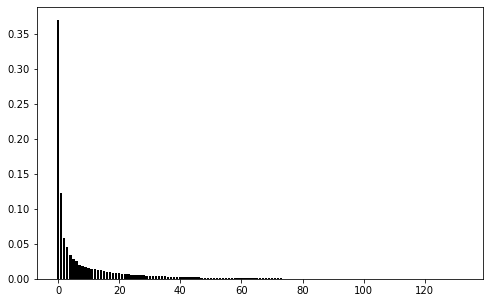

In [8]:
import matplotlib.pyplot as plt
features= range(pca.n_components_)
plt.figure(figsize=(8,5))
plt.bar(features,pca.explained_variance_ratio_,color="black")


In [39]:
from sklearn.linear_model import LinearRegression
pca=PCA() #5 component ile yap 
X_reduced_train=pca.fit_transform(scale(X_train))
lm=LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [40]:
y_pred=pcr_model.predict(X_reduced_train)
y_pred.shape

(3844,)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train,y_pred))

32.366716188057204

In [42]:
mean_squared_error(y_train,y_pred)

1047.604316798244

In [43]:
df["90_target"].mean()

-4.115568369248927

In [44]:
r2_score(y_train,y_pred)

0.2174524810427796

Text(0, 0.5, 'PC2')

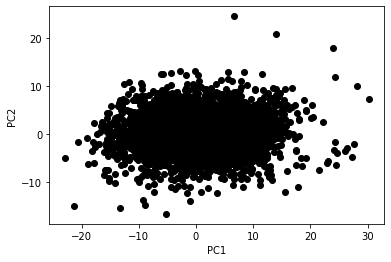

In [14]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0],PCA_components[1], color="black")
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC3')

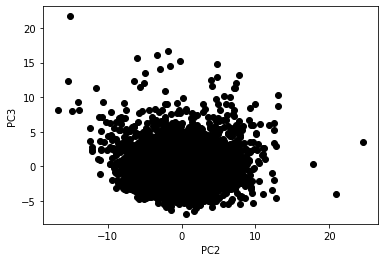

In [15]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[1],PCA_components[2], color="black")
plt.xlabel("PC2")
plt.ylabel("PC3")

Text(0, 0.5, 'PC4')

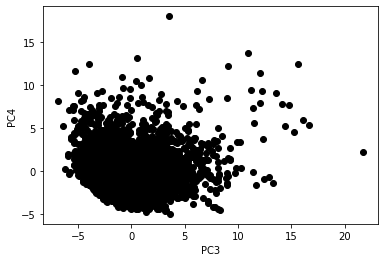

In [45]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[2],PCA_components[3], color="black")
plt.xlabel("PC3")
plt.ylabel("PC4")

Text(0, 0.5, 'PC5')

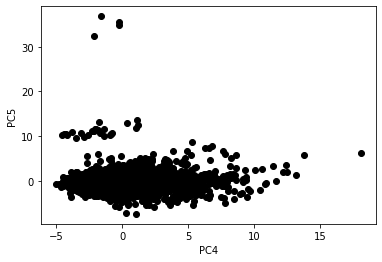

In [46]:
from pandas import Series, DataFrame
PCA_components=pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[3],PCA_components[4], color="black")
plt.xlabel("PC4")
plt.ylabel("PC5")

# Decision Tree 

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import io
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [5]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [6]:
import pandas as pd
dms=pd.get_dummies(df[["ind_109"]])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [7]:
y=df["90_target"]
X_=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3.0,30.752568,-5.0,-22.0,-22.0,-21.0,-23.0,-36.0,-40.0,...,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3.0,36.812130,-6.0,-18.0,-24.0,-24.0,-25.0,-38.0,-43.0,...,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3.0,39.648290,-4.0,-11.0,-21.0,-22.0,-24.0,-36.0,-42.0,...,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3.0,40.902782,-5.0,-10.0,-21.0,-23.0,-26.0,-37.0,-44.0,...,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2.0,48.462194,-18.0,-26.0,-37.0,-40.0,-43.0,-53.0,-61.0,...,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 133 entries, ind_5 to ind_109_GREEN
dtypes: float64(132), uint8(1)
memory usage: 5.2 MB


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [9]:
cart_model=DecisionTreeRegressor()

In [10]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [11]:
y_pred=cart_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test,y_pred))

21.793844927563015

In [13]:
r2_DT=r2_score(y_test,y_pred)
r2_DT

0.649656297612133

## Model Tuning

In [14]:
cart_params={"min_samples_split":[100,150,200],
            "min_samples_leaf":[100,150,200],
            "max_leaf_nodes":range(5,10),
            "max_depth":range(1,10)}

In [15]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10,n_jobs=-1,verbose=2)

In [ ]:
cart_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2508 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3968 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4050 out of 4050 | elapsed:  5.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': [1

In [ ]:
print("en iyi parametreler"+ str(cart_cv_model.best_params_))

en iyi parametreler{'max_depth': 8, 'max_leaf_nodes': 9, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [16]:
cart_tuned=DecisionTreeRegressor(max_depth=8, max_leaf_nodes= 9, min_samples_leaf= 100,min_samples_split= 100,random_state=42)

In [17]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [18]:

y_pred=cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

32.80109419759

[Text(460.35, 498.3, 'X[54] <= 11.5\nmse = 1338.71\nsamples = 3844\nvalue = -4.451'),
 Text(404.55, 407.70000000000005, 'X[92] <= 1.239\nmse = 1275.643\nsamples = 3077\nvalue = -8.791'),
 Text(251.10000000000002, 317.1, 'X[90] <= 0.0\nmse = 1306.03\nsamples = 2539\nvalue = -5.499'),
 Text(111.60000000000001, 226.5, 'X[96] <= 1.19\nmse = 1117.511\nsamples = 1001\nvalue = -15.036'),
 Text(55.800000000000004, 135.89999999999998, 'mse = 1291.084\nsamples = 527\nvalue = -5.325'),
 Text(167.4, 135.89999999999998, 'mse = 703.109\nsamples = 474\nvalue = -25.833'),
 Text(390.6, 226.5, 'X[87] <= 1.237\nmse = 1331.014\nsamples = 1538\nvalue = 0.707'),
 Text(279.0, 135.89999999999998, 'X[42] <= 82.5\nmse = 1244.041\nsamples = 754\nvalue = -8.368'),
 Text(223.20000000000002, 45.299999999999955, 'mse = 1151.212\nsamples = 651\nvalue = -12.931'),
 Text(334.8, 45.299999999999955, 'mse = 867.81\nsamples = 103\nvalue = 20.466'),
 Text(502.20000000000005, 135.89999999999998, 'X[87] <= 1.245\nmse = 1259.2

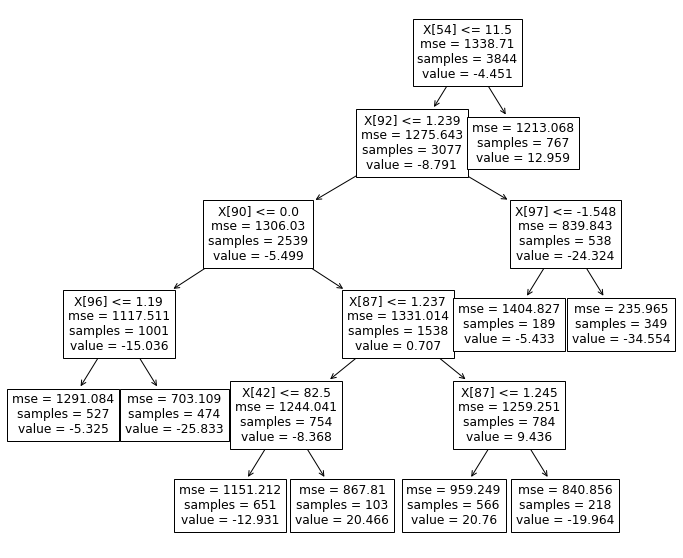

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(cart_tuned)

In [20]:
r2_DT_tuned=r2_score(y_test,y_pred)
r2_DT_tuned

0.20639706510175182

# RANDOM FOREST

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf_model=RandomForestRegressor(random_state=42)

In [23]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Prediction

In [24]:
rf_model.predict(X_test)[0:5]

array([ 30.3645684 , -36.86739676, -29.59755662,  35.26185994,
        36.75555936])

In [25]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

15.241884598832966

In [26]:
r2_RF=r2_score(y_test,y_pred)
r2_RF

0.8286421751704195

## Model Tuning

In [32]:
rf_params = {"min_samples_split":(100,200),"max_depth":(5,10),
              "n_estimators": [20,50]}

In [33]:
rf_model=RandomForestRegressor(random_state=42)

In [34]:
rf_cv_model=GridSearchCV(rf_model,rf_params, cv=10,n_jobs=-1)

In [35]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [36]:
rf_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 50}

In [37]:
rf_tuned=RandomForestRegressor(max_depth=10,min_samples_split=100,n_estimators=50)

In [38]:
rf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=100, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
y_pred=rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

22.482842999178995

In [40]:
r2_RF_tuned=r2_score(y_test,y_pred)
r2_RF_tuned

0.6271543693744241

In [41]:
Importance=pd.DataFrame({"Importance":rf_tuned.feature_importances_*100},
                       index=X_train.columns)

Text(0.5, 0, 'Değişken Önem düzeyleri')

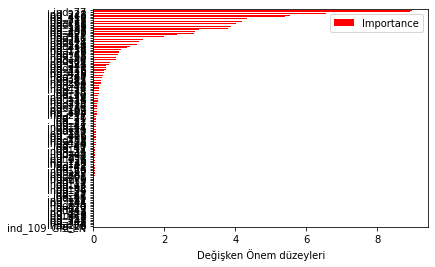

In [42]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="r")
plt.xlabel("Değişken Önem düzeyleri")

# Neural Network

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [46]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [47]:
from sklearn.neural_network import MLPRegressor

In [48]:
mlp_model=MLPRegressor(hidden_layer_sizes=(100,20),max_iter=10000, random_state=42).fit(X_train_scaled,y_train)
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
?mlp_model

In [ ]:
mlp_model.n_layers_

4

In [ ]:
mlp_model.n_iter_

241

In [ ]:
mlp_model.hidden_layer_sizes

(100, 20)

## Prediction

In [49]:
y_pred=mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

21.91768527753872

In [51]:
r2_NN=r2_score(y_test,y_pred)
r2_NN

0.6456634311744252

## Model Tuning

In [52]:
mlp_param = {"alpha": [0.1,0.01],
             "hidden_layer_sizes": [(50,50),(100,100), (100,50,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=5, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=10000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=42, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation

In [53]:
mlp_cv_model.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}

In [54]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(50,50), activation="logistic")
mlp_tuned.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [55]:
y_pred = mlp_tuned.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

23.95985234829101

In [56]:
r2_NN_tuned=r2_score(y_test,y_pred)
r2_NN_tuned

0.5765570785943696

# SVR 

In [3]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import io
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
df=df.copy()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [6]:
import numpy as np
df=df.replace('?',np.nan)
df = df.dropna()

In [9]:
y=df["90_target"]
X=df.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')

X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3.0,30.752568,-5.0,-22.0,-22.0,-21.0,-23.0,-36.0,-40.0,...,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3.0,36.812130,-6.0,-18.0,-24.0,-24.0,-25.0,-38.0,-43.0,...,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3.0,39.648290,-4.0,-11.0,-21.0,-22.0,-24.0,-36.0,-42.0,...,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3.0,40.902782,-5.0,-10.0,-21.0,-23.0,-26.0,-37.0,-44.0,...,1.199694,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2.0,48.462194,-18.0,-26.0,-37.0,-40.0,-43.0,-53.0,-61.0,...,1.199477,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 132 entries, ind_5 to ind_428
dtypes: float64(132)
memory usage: 5.2 MB


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [125]:

svr_model = SVR("linear").fit(X_train, y_train)


In [126]:
svr_model.predict(X_train)[0:5]

array([ 11.52989207, -22.84494915,  18.94098991, -27.36096555,
        21.46294045])

In [127]:
y_train[0:5]

5329    36.160668
4217   -36.806235
714     37.684820
5731   -35.708156
5061    35.458229
Name: 90_target, dtype: float64

In [128]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

37.443409906122206

In [129]:
y_pred = svr_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

35.21493700328338

## Model Tuning

In [ ]:
svr_params = {"C": np.arange(1,5,1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
str(svr_cv_model.best_params_)

In [ ]:
svr_model = SVR("linear", C=0.1).fit(X_train, y_train)

In [ ]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

37.443409906122206

# Naive Bayes

In [12]:
import io
from pandas import read_excel
df= read_excel('HW_Data_Set.xlsx', sheet_name = 'Sheet1')
dfnb=df.copy()
dfnb.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2,15,13,1,56,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3,30.752568,-5,-22,-22,-21,-23,-36,-40,...,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44,-23,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0,11,11,1,63,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3,36.812130,-6,-18,-24,-24,-25,-38,-43,...,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48,-16,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5,15,9,-1,65,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3,39.648290,-4,-11,-21,-22,-24,-36,-42,...,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48,-10,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11,18,8,0,68,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3,40.902782,-5,-10,-21,-23,-26,-37,-44,...,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51,-10,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13,23,10,10,91,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2,48.462194,-18,-26,-37,-40,-43,-53,-61,...,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70,-24,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


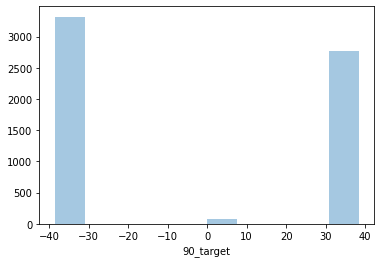

In [13]:
import seaborn as sns
sns.distplot(dfnb["90_target"],kde=False)

In [14]:
dfnb["90_target"][100]

37.01957905

In [15]:
for i in range(len(dfnb["90_target"])):
  if dfnb["90_target"][i]>=-40 and dfnb["90_target"][i]<=-30:
    dfnb["90_target"][i]=0
  if dfnb["90_target"][i]>-10 and dfnb["90_target"][i]<10:
    dfnb["90_target"][i]=1
  if dfnb["90_target"][i]>30 and dfnb["90_target"][i]<40:
    dfnb["90_target"][i]=2
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
import numpy as np
dfnb=dfnb.replace('?',np.nan)
dfnb = dfnb.dropna()

In [17]:
y=dfnb["90_target"]
X_=dfnb.drop(["ind_109","50_target","90_target","20_target"],axis=1).astype('float64')
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,ind_17,ind_18,ind_19,ind_20,ind_21,ind_22,ind_23,ind_25,ind_26,ind_27,ind_28,ind_29,ind_30,ind_31,ind_32,ind_33,ind_34,ind_35,ind_36,ind_37,ind_39,ind_40,ind_41,ind_42,ind_43,ind_44,ind_45,ind_46,ind_47,ind_48,...,ind_243,ind_309,ind_310,ind_311,ind_313,ind_315,ind_316,ind_318,ind_321,ind_324,ind_327,ind_330,ind_332,ind_334,ind_338,ind_340,ind_344,ind_345,ind_347,ind_349,ind_351,ind_352,ind_387,ind_392,ind_397,ind_399,ind_403,ind_404,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,12.060000,9.1100,2.0,15.0,13.0,1.0,56.0,0.002690,-0.002670,0.000010,66.666667,93.692449,146.592674,150.505806,154.486989,158.009516,142.421114,142.023350,196.592517,184.819232,31.939605,3.0,30.752568,-5.0,-22.0,-22.0,-21.0,-23.0,-36.0,-40.0,...,1.200346,-0.000013,-1.524694,97.980028,1.179209,-0.756946,98.905563,1.190348,99.156641,-0.000062,12.056738,-0.157039,20.967742,-0.000091,1.197238,-0.319064,0.0,0.0,0.0,0.0,0.0,0.0,-3.731343,-32.587430,-26.386973,-0.003323,0.045130,-0.044678,-44.0,-23.0,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,11.326667,9.2225,0.0,11.0,11.0,1.0,63.0,0.002729,-0.003111,-0.000191,66.666667,76.694104,140.227205,156.903278,161.604303,169.720843,152.634492,149.634976,201.738617,191.985663,38.478501,3.0,36.812130,-6.0,-18.0,-24.0,-24.0,-25.0,-38.0,-43.0,...,1.200129,-0.000013,-1.523934,97.932319,1.179223,-0.756569,98.859627,1.190389,99.111914,-0.000062,11.971831,-0.156961,20.800000,-0.000091,1.197328,-0.318905,0.0,0.0,0.0,0.0,0.0,0.0,-1.369863,-38.115965,-26.085949,-0.000476,0.035314,-0.034961,-48.0,-16.0,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,10.973333,9.3125,5.0,15.0,9.0,-1.0,65.0,0.002780,-0.003530,-0.000375,66.666667,83.909974,117.755945,154.452274,164.015689,175.947530,160.181486,155.527932,205.238017,197.993551,28.917197,3.0,39.648290,-4.0,-11.0,-21.0,-22.0,-24.0,-36.0,-42.0,...,1.199911,-0.000013,-1.523580,97.910664,1.179236,-0.756393,98.839991,1.190429,99.093554,-0.000062,11.888112,-0.156925,20.634921,-0.000091,1.197419,-0.318831,0.0,0.0,0.0,0.0,0.0,0.0,-4.278922,-40.428126,-23.250410,-0.000309,0.005860,-0.005802,-48.0,-10.0,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,10.426667,9.4150,11.0,18.0,8.0,0.0,68.0,0.002679,-0.003961,-0.000641,66.666667,98.596644,100.147384,139.695620,158.006863,171.688382,161.192133,156.413230,203.641362,200.370912,31.449631,3.0,40.902782,-5.0,-10.0,-21.0,-23.0,-26.0,-37.0,-44.0,...,1.199694,-0.000013,-1.522935,97.870334,1.179249,-0.756073,98.801500,1.190469,99.056290,-0.000062,11.805556,-0.156858,20.472441,-0.000091,1.197509,-0.318696,0.0,0.0,0.0,0.0,0.0,0.0,-1.355422,-45.019355,-19.499975,0.001137,-0.018252,0.018070,-51.0,-10.0,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,11.406667,9.8925,13.0,23.0,10.0,10.0,91.0,0.003986,-0.004624,-0.000319,66.666667,149.283572,124.092409,168.275524,196.846256,208.017747,193.924291,184.995906,227.848369,223.561880,50.406504,2.0,48.462194,-18.0,-26.0,-37.0,-40.0,-43.0,-53.0,-61.0,...,1.199477,-0.000013,-1.520349,97.705214,1.179263,-0.754789,98.637028,1.190509,98.892717,-0.000062,11.724138,-0.156592,20.312500,-0.000091,1.197600,-0.318155,0.0,0.0,0.0,0.0,0.0,0.0,-0.116144,-54.849177,-25.348270,0.001552,-0.007183,0.007111,-70.0,-24.0,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [18]:
X_trainNB,X_testNB,y_trainNB,y_testNB=train_test_split(X,y,test_size=0.25, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_trainNB)
X_train_scaled = scaler.transform(X_trainNB)
X_test_scaled = scaler.transform(X_testNB)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
nb = MultinomialNB()
nb_model = nb.fit(X_train_scaled, y_trainNB)
nb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = nb_model.predict(X_test_scaled)
accuracy_score(y_testNB, y_pred)

0.5889235569422777

In [23]:
y_pred = nb_model.predict(X_train_scaled)
accuracy_score(y_trainNB, y_pred)

0.5972944849115505

# Gradient Boosting Machines

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

24.805329251200742

## Model Tuning

In [38]:
gbm_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 8]
 }

In [39]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 12.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [40]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8}

In [41]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 8)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [42]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

14.832047729201628

In [43]:
y_pred = gbm_tuned.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

0.9748468424606203

In [44]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

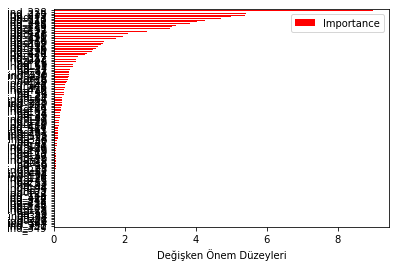

In [47]:
import matplotlib.pyplot as plt
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [51]:
knn_model.n_neighbors

5

In [52]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

27.517771605527976

In [53]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  13.51511997525359
k = 3 için RMSE değeri:  17.254904221084033
k = 4 için RMSE değeri:  19.99267145959896
k = 5 için RMSE değeri:  21.54128374996204
k = 6 için RMSE değeri:  22.86496993147191
k = 7 için RMSE değeri:  23.939374449305355
k = 8 için RMSE değeri:  25.029812513040145
k = 9 için RMSE değeri:  25.906740470110506
k = 10 için RMSE değeri:  26.591824411675375


## Model Tuning

In [58]:
knn_params = {'n_neighbors': np.arange(1,10,1)}

In [59]:
knn = KNeighborsRegressor()

In [60]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [61]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
knn_cv_model.best_params_["n_neighbors"]

2

In [63]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  28.016986643457802
k = 2 için RMSE değeri:  13.51511997525359 RMSE_CV değeri:  26.633409871739197
k = 3 için RMSE değeri:  17.254904221084033 RMSE_CV değeri:  27.23621444834389
k = 4 için RMSE değeri:  19.99267145959896 RMSE_CV değeri:  27.3914076263531
k = 5 için RMSE değeri:  21.54128374996204 RMSE_CV değeri:  27.86505215469714
k = 6 için RMSE değeri:  22.86496993147191 RMSE_CV değeri:  28.550626370922714
k = 7 için RMSE değeri:  23.939374449305355 RMSE_CV değeri:  29.219244955855412
k = 8 için RMSE değeri:  25.029812513040145 RMSE_CV değeri:  29.621653581511918
k = 9 için RMSE değeri:  25.906740470110506 RMSE_CV değeri:  29.977755742903696
k = 10 için RMSE değeri:  26.591824411675375 RMSE_CV değeri:  30.29438781769275


In [64]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [65]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

26.66611299566255